# CS 410/1411 Homework 7: Logistic Regression and Deep Learning

Welcome to Homework 7!

In this assignment, you'll be building multiple binary classifiers. The first two will use logistic regression, and the second, perceptrons. You will be applying these classifiers to classify points in a pickaxe drawing, where the points on the handle are one color, and the axes, another. As such points are not linearly separable, the logistic regression classifier will not succeed. Neither will a simple perceptron. A multilayer perceptron, however, will accomplish this task.

What you will know:
- what it means for data to be linearly separable
- how backpropagation works

What you will be able to do:
- build a binary classifier using logistic regression
- build a binary classifier using perceptrons
- use Python's `PyTorch` library

Let's *dig* into it.

## Binary Classification Task

In this assignment, you will train a binary classifier to predict the color (brown or blue) of a point $(x_1, x_2)$ on the Cartesian plane. In fact, your classifier will not predict merely 0 or 1; rather, it will predict a probability $p \in [0, 1]$ that the point is blue.

**Checkpoint**: What would a prediction of $0.9$ signify? And what about $0.05$?

## Logistic Regression

Logistic regression is used for binary classification, i.e., to classify a point as either 1 or 0. In fact, points are assigned probabilities that their classification is 1, much like you might do at an impure leaf of a decision tree.

Assume we are given a data set $\mathcal{D} = \{ (\bm{x}_i, y_i) \}_{i=1}^m$ of $m$ sample points $\bm{x}_i$ with corresponding labels $y_i$.

As linear models are the simplest to build, the main idea of logistic regression is to fit a linear model, with parameters, say,  $\bm{w}$ and $b$, not to the $(\bm{x}_i, y_i)$ directly as in linear regression, but rather to the odds ratio: i.e., the ratio of the probability of class 1 to the probability of class 0. Given a point $\bm{x}$,
$$ \frac{p (\bm{x})}{1 - p (\bm{x})} = \bm{w}^T \bm{x} + b $$

In fact, for mathematical simplicity, a linear model is fit to the natural log of the odds ratio instead:
$$ \ln \left( \frac{p (\bm{x})}{1 - p (\bm{x})} \right) = \bm{w}^T \bm{x} + b $$

Rearranging this formula yields:
$$ p (\bm{x}) = \frac{1}{1 + e^{- \left( \bm{w}^T \bm{x} + b \right) }} $$

Our goal is to infer, or learn, parameter values for $\bm{w}$ and $b$ so that $p (\bm{x})$ accurately reflects the class to which $\bm{x}$ belongs: i.e., $p (\bm{x})$ is close to 1, when $\bm{x}$ is labeled 1; and $p (\bm{x})$ is close to 0, otherwise.

We call the process of using our model to predict a label $\hat{y}$ from $\bm{x}$ **forward propagation** or the **forward pass**.

Let $p_i \doteq p (\bm{x}_i)$ denote the model's prediction on input $\bm{x}_i$ with true label $y_i \in \{ 0, 1 \}$. The model's loss on this input can be described as $$- (y_i \log p_i + (1 - y_i) \log (1 - p_i))$$ a quantity known as **cross entropy**. When $y_i = 1$, this loss evaluates to $- \log p_i$; and when $y_i = 0$, this loss evaluates to $- \log (1 - p_i)$. In this way, if $y_i = 1$, values of $p_i$ close to 1 yield loss close to 0; on the other hand, if $y_i = 0$, values of $p_i$ close to 0 yield loss close to 0.

<!-- **Cross Entropy:** Given two Bernoulli random variables $A$ and $B$, the expression $- \left( A \log B + (1 - A) \log (1 - B) \right)$ is known as the **cross entropy** between them. -->

**Checkpoint**: The loss contains two terms. What do these terms represent? What happens to the loss when $p_i \approx y_i$? And what happens when they differ dramatically?

The goal in logistic regression is find $\bm{p} = (p_1, \ldots, p_m)$ that minimize the cross entropy of the data:
$$
C_{\mathcal{D}} (\bm{p}) \doteq - \sum_{i = 1}^m (y_i \log p_i + (1 - y_i) \log (1 - p_i))
$$
This optimization is over the parameters $\bm{w}$ and $b$ that define each $p_i$ as a function of $\bm{x}_i$, so we will express it as $C (\bm{w}, b)$, dropping the subscript ${\mathcal{D}}$, as it is clear from context.

As it turns out, this optimization problem does not have a closed-form solution. Instead, we are forced to resort to gradient descent. The partial derivatives of $C$ with respect to each of its parameters is given by:
$$\frac{\partial C (\bm{w}, b)} {\partial w_j} = \frac{1}{m} \sum_{i=1}^m (p(\bm{x}_i) - y_i) x_{ij}$$
and
$$\frac{\partial C (\bm{w}, b)} {\partial b} = \frac{1}{m} \sum_{i=1}^m (p(\bm{x}_i) - y_i)$$

We update the parameters of the model $\bm{w}$ and $b$ using this gradient information as follows:
$$\bm{w}^{\textrm{new}}_j = \bm{w}^{\textrm{old}}_j - \alpha \frac{\partial C (\bm{w}, b)}{\partial \bm{w}_j}$$
and
$$b^{\textrm{new}} = b^{\textrm{old}} - \alpha \frac{\partial C (\bm{w}, b)}{\partial b}$$

where $\alpha$ is a learning rate.

This process of calculating gradients and updating the model's parameters is called the **backward pass** or **backpropagation**.

<!-- ASIDE: MLE Interpretation of Logistic Regression

We model each class label as a draw from a Bernoulli random variable $Y_i$ which takes value $1$ with probability $p_i \doteq p (\bm{x}_i)$, and value 0, otherwise:
$$
\mathcal{P}_{p_{i}} (Y_i) =
\begin{cases}
p_i & \text{if $Y_i = 1$} \\
1 - p_i & \text{if $Y_i = 0$}
\end{cases}
$$

Equivalently, $\mathcal{P}_{p_{i}} (Y_i) = p_i^{Y_i} (1 - p_i)^{1 - {Y_i}}$.

We can reinterpret this family of probability functions as a likelihood function: $\mathcal{L}_{y_i} (p_i) = p_i^{Y_i} (1 - p_i)^{1 - {Y_i}}$, given data point $(\bm{x}_i, y_i)$. Taking logs yields
$$\log \mathcal{L}_{y_i} (p_i) = Y_i \log p_i + (1 - Y_i) \log (1 - p_i)$$

Recall that $p_i$ is defined by the parameters $\bm{w}$ and $b$. The goal in logistic regression, therefore, is to find parameters $\bm{w}$ and $b$ that maximize the (log) likelihood of the data, as defined by this expression.

**Note:** The negative log likelihood $\log \mathcal{L}_{y_i} (p_i)$ is an expression of the cross entropy between Bernoulli random variable $Y_i$, the label, and the Bernoulli random variable that describes the model's predicted labels, i.e., 1 with probability $p_i$. Logistic regression is also often described as minimizing cross entropy "loss", rather than as maximizing likelihood. -->

## Part 0: The Data


In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import torch

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

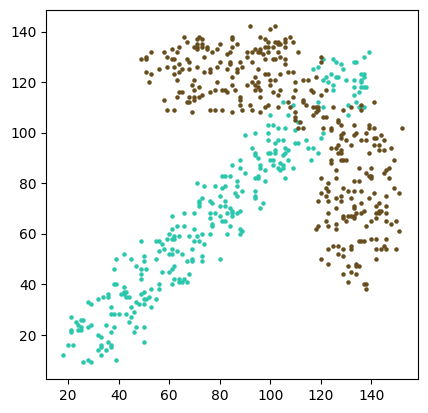

In [3]:
BLUE = '#2bc7ad'
BLUE_PIXEL = np.array([104, 78, 30])
BROWN = '#684e1e'
BROWN_PIXEL = np.array([43, 199, 172])

def load_data(filename: str):
    """
    Load image of pickaxe (or other image with the filename)
    Load n pixels of pickaxe and returns array of shape (m, 3)
    For each pixel, store the x, y, and label

    plot the data as well.
    Input:
        filename: file where data is stored
    Output:
        data_points: numpy array of shape (m, 3).
    """
    # Generate the dataset
    image = Image.open(filename)
    width, height = image.size
    pixels = list(image.getdata())

    # pixels holds RGB values for all pixels in image
    pixels = np.array([pixels[i * width:(i + 1) * width] for i in range(height)])

    data_points_blue = []
    data_points_brown = []

    data_points = []

    for i in reversed(range(height)):
        for j in range(width):
            pixel = pixels[height-i-1, j, :]
            if np.array_equal(pixel, BROWN_PIXEL):
                data_points.append(np.array([j, i, 1]))
                data_points_brown.append([j, i])
            elif np.array_equal(pixel, BLUE_PIXEL):
                data_points.append(np.array([j, i, 0]))
                data_points_blue.append([j, i])

    data_points = np.array(data_points)
    data_points_blue = np.array(data_points_blue)
    data_points_brown = np.array(data_points_brown)

    # Visualize the dataset
    plt.scatter(data_points_blue[:, 0], data_points_blue[:, 1], c=BLUE, s=5) # blue-ish
    plt.scatter(data_points_brown[:, 0], data_points_brown[:, 1], c=BROWN, s=5) # Brown

    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

    return data_points

data_points = load_data("NoisyPickaxe.png");

Observe that this dataset is *not* linearly separable, there is no line we can draw on this image that perfectly separates the blue and brown pixels.

In [4]:
def create_dataset(data_points: np.ndarray):
  """
  Take in data_points of shape (m, 3), return X, y features and labels

  Inputs:
    - data_points: (m, 3) array of x, y, label
  Outputs:
    - X: Feature Matrix of (m, 2)
    - y: Label vector of shape (m, 1)
  """
  # Gather X, y for dataset
  X = np.zeros((data_points.shape[0], 2)) # All of our points
  for idx, pixel in enumerate(data_points):
    X[idx, :] = pixel[0:2]

  # The corresponding labels for our points
  y = data_points[:, 2]
  y = y.reshape(-1, 1)

  X = X / (X.max() - X.min())

  return X, y

X, y = create_dataset(data_points)
print("Features shape:", X.shape, "Labels shape:", y.shape)

Features shape: (625, 2) Labels shape: (625, 1)


## Part 1: Logistic Regression with NumPy and Gradient Descent


In this section, you'll implement logistic regression (from scratch) using `NumPy`.

To do so, you will code the following functions:
1. `initialize_parameters`: Initialize the weights and bias terms to 0
1. `sigmoid`: Implement the sigmoid activation function using numpy
1. `forward`: Run the model's forward pass, i.e., compute the model's predicted probabilities
1. `backward`: Computes the gradients of the loss with respect to the model's parameters
1. `predict`: Converts the model's predicted probabilities into binary labels (1 iff the prediction exceeds 0.5)
1. `accuracy`: Returns the model's accuracy (i.e., its average number of mistakes)
1. `optimize`: Use gradient descent to minimize cross entropy loss

### Task: Helper Functions

You should start by implementing the requisite helper functions.

Notes about numpy:
1. "shape" errors are errors that arise when you try to run an operation with incompatible matrices. For example, you cannot multiply two matrices with shapes (1, 2), (3, 4). Debugging shape errors comes down to tracking the shapes of your arrays leading up to the error. It is important from both a programming and conceptual point of view that you understand what the shapes of your matrices *should* be. If you ask a TA a question about a shape error, the first thing they'll ask you is what the shapes *should* be.
1. None of these functions require a for loop. We will deduct points if a for loop is used in these helper functions. For instance, you should not write a loop to sum the elements of a vector, when there is a numpy function that does exactly that (i.e., `np.sum`).
1. One very useful numpy operation is to create a *boolean array*. For example, consider the numpy array `a=np.array((1, 2, 3, 4, 5))`. The operation `a % 2 == 0` creates the array of booleans `np.array([False, True, False, True, False])`. If you wanted to count the number of even numbers in `a`, you could simply run `np.sum(a % 2 == 0)` (Python considers False=0 and True=1).
1. If you find you are missing a dimension, i.e., you want a array of shape $(n, 1)$ and have an array of shape $(n,)$, you can use the `reshape` method to add the additional dimension. Reshape takes a desired shape as input. Again, if you do not know what the shape should be you will run into many issues trying to debug your code. You must understand the shapes of your vectors and matrices in order to work efficiently. Trial and error won't work for numpy.

In [5]:
def initialize_parameters(d: int):
    """
    Initialize w vector and bias term based on the number of features
    Hint: you can use np.zeros to initialize a vector of all 0s with a given shape.
    In practice, you may want to use random initial parameters, but all 0s works fine here.

    You should confirm the shapes of your parameters are correct before doing anything else!
    If these are wrong, everything down the line will be wrong as well.

    Inputs:
        - d: number of features in dataset
    Outputs:
        - w: weights vector of shape (d, 1)
        - b: bias term (float)
    """
    w, b = None, None
    w = np.zeros((d, 1))
    b = 0
    return w, b

def sigmoid(z: np.ndarray):
    """
    Implement the sigmoid function.

    sigmoid(z) = 1 / (1 + e^(-z))

    Must work where z is a single input (i.e., a float) or a vector (i.e., an array of shape (m))

    Inputs:
        - z: input value
    Outputs:
        - output of sigmoid(z)
    """
    output = 1 / (1 + np.exp(-z))
    return output

def forward(w, b, X):
    """
    Run a forward pass of logistic regression given model parameters (w, b) and data X
    Compute the output of the logistic regression from input matrix X and parameters w and b

    Inputs:
        - w: weights term of shape (d, 1)
        - b: bias term (float)
        - X: input data of shape (m, d)
    Output:
        - predicted probabilities of shape (m, 1)
    """
    z = X.dot(w) + b
    predictions = sigmoid(z)
    return predictions

def backward(p_pred, X, y):
    """
    Given the model's inputs (X), outputs (p_pred), and true labels (y), compute the gradients of the loss with respect to w and b
    Return a tuple of (dw, db), where dw is the gradient wrt w and db is the gradient wrt b.
    dw should be a column vector of shape (d, 1) and db should be a scalar.

    Inputs:
        - p_pred: predicted probabilities of shape (m, 1)
        - X: input data of shape (m, d)
        - y: true labels of shape (m, 1)
    Outputs:
        - dw: gradient of the loss with respect to w, of shape (d, 1)
        - db: gradient of the loss with respect to b, a scalar
    """
    dw, db = None, None
    m = X.shape[0]
    dw = (1/m) * np.dot(X.T, (p_pred - y))
    db = (1/m) * np.sum(p_pred - y)
    return dw, db

def predict(w, b, X):
    """
    Run logistic regression model forward to compute predictions

    Turn predictions into labels
    Everything with probability > 0.5 is classified as a 1, everything else as a 0.
    Should call forward() and convert the outputs to labels.

    This method is used for computing accuracy and plotting decision boundaries.

    - Inputs:
        - w: weights term of shape (d, 1)
        - b: bias term (float)
        - X: input data of shape (m, d)
    Output:
        - predicted labels of shape (m, 1)
    """
    forward_predicted = forward(w, b, X)
    labels = np.where(forward_predicted > 0.5, 1, 0)
    return labels


def accuracy(predicted_labels, y):
    """
    Compute accuracy between predicted_labels and y

    Inputs:
        predicted_labels: predicted labels of shape (m, 1)
        y: true labels of shape (m, 1)
    Outputs:
        - accuracy: accuracy of the model (float)
    """
    # count num instances where predicted == true
    correct = (predicted_labels == y).sum()
    # divide by num predictions
    accuracy = correct/len(predicted_labels)
    return accuracy

### Task: Gradient Descent

Next, you'll move on to implementing gradient descent.

Fill in the `optimize` function so that it first runs the model forward to make predictions, and then backwards to compute the gradients of the loss with respect to the model's parameters. Finally, it updates the parameter values based on their gradients.

You should expect your model to exhibit approximately 83% accuracy.

In [6]:
# Optimization using gradient descent
def optimize(w, b, X, y, num_iterations, learning_rate):
    """
    For a given set of model parameters (w, b) and dataset (X, y), run gradient descent for num_iterations
    Fill in the lines for the forward step (get model outputs), backward step (get gradient dL/dw, dL/db)
    and then update parameters w and b accordingly

    Inputs:
        w: weights term of shape (d, 1)
        b: bias (float)
        X: input data of shape (m, d)
        y: labels of shape (d, 1)
        num_iterations: number of iterations to run gradient descent for
        learning_rate: The learning rate for parameter updates

    Outputs:
        params: Model parameters for the final model {"w": np.ndarray, "b": float}
        params_list: List of previous parameter settings (for animation)
    """
    params_list = []
    for i in range(num_iterations):
        # TODO: Fill in, provide comments but not code
        # Forward propagation
        p_pred = None
        z = X.dot(w) + b
        p_pred = sigmoid(z)

        # Backward propagation
        dw, db = None, None
        m = X.shape[0]
        dw = np.dot(X.T, (p_pred - y))
        db = np.sum(p_pred - y)

        # Update parameters w, b
        w =  w - learning_rate * dw
        b =  b - learning_rate * db
        # End TODO

        # We'll track the parameters throughout the training process for some visualizations.
        params_list.append((w, b))

    params = {"w": w, "b": b}

    return params, params_list

# Extract n_features from X (it's 2 features for x, y of pixels)
n_features = X.shape[1]
w, b = initialize_parameters(n_features)
params_np, params_list = optimize(w, b, X, y, num_iterations=5000, learning_rate=0.001)

# Predictions and accuracy
predictions_np = predict(params_np["w"], params_np["b"], X)
accuracy_np = np.mean(predictions_np == y)
print("Final Model:")
print(f"NumPy model accuracy: {accuracy_np:.2f}")

Final Model:
NumPy model accuracy: 0.82


### Task: Decision Boundaries

The **decision boundary** of a binary classifier depicts where the decisions change from 0's to 1's. We provide support code so that you can plot the decision boundaries of the binary classifier's you build in this assignment.

Our code to generate a decision boundary first samples a large number of inputs, and then applies the model to predict the corresponding outputs. Note that these predictions are made using the `predict` function, not the `forward` function. In particular, they are labels not probabilities.

Run the support code below to visualize your logistic regression model's predictions and plot its decision boundary.

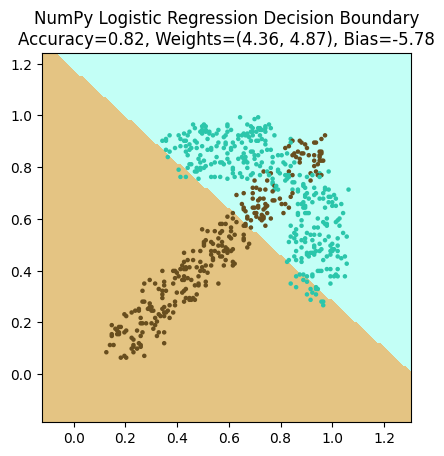

In [7]:
def plot_decision_boundary(w, b, X, y):
    """
    Plot decision boundary of the logistic regression model.
    """
    # Add a little bit of a border to x_min/max and y_min/max for plotting
    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Pass all x, y pairs through sigmoid function
    all_points = np.c_[xx.ravel(), yy.ravel()]
    Z = predict(w, b, all_points)

    # Convert back to grid-shape
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=1, levels=[-1, 0, 1], colors=["#E4C483", "#C3FFF6"])
    color_dict = {0 : tuple(BLUE_PIXEL/256), 1 : tuple(BROWN_PIXEL/256)}
    colors = [color_dict[label] for label in y[:, 0]]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=5)
    pred = predict(w, b, X)
    plt.title(f"NumPy Logistic Regression Decision Boundary\nAccuracy={accuracy(pred, y):.2f}, Weights=({w[0, 0]:.2f}, {w[1, 0]:.2f}), Bias={b:.2f}")
    plt.gca().set_aspect('equal', adjustable='box')
    plot = plt.gcf()
    return plot

plot = plot_decision_boundary(params_np["w"], params_np["b"], X, y)

### Task: Gradient Descent Animation

Run the support code below to create an animation of your model's decision boundary--in particular, to see how it changes over the course of running the gradient descent algorithm.

**Note:** The rendering process is slow. It may take upwards of two minutes to run. It is very useful to see this animation, but you need not run this cell every time you run through the notebook.

In [8]:
from functools import partial
from matplotlib import animation
from matplotlib.animation import PillowWriter
import copy

def create_gradient_descent_animation(X, y, params_list, filename='gradient_descent.gif', fps=30):
    """
    Create and save an animation of the decision boundary changing during gradient descent.
    Note these animations are educational, but can take significant time to run.
    """
    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(8, 6))

    # add another second of the final frame
    # params_list =

    def animate(i):
        i = min(len(params_list) - 1, i)
        w, b = params_list[i]
        plot_decision_boundary(w, b, X, y)

    # Create the animation
    anim = animation.FuncAnimation(
        fig,
        animate,
        frames=len(params_list)+fps,
        interval=1000/fps,
        blit=False,
    )

    writer = animation.PillowWriter(
        fps=fps,
        codec='gif',
    )

    # Save animation
    anim.save(filename, writer=writer)
    plt.close()

# Create and save the animation, only plot the first 100 steps for speed, you can increase this if desired
plot = create_gradient_descent_animation(X, y, params_list[:100], fps=33)

## Part 2: Logistic Regression with PyTorch

The goal of the next part of the assignment is for you to start to become familiar with the PyTorch library, a popular library for building neural networks. To that end, we've provided you with another implementation of logistic regression, this time using PyTorch. Read through our code carefully, comparing this implementation to your implementation of logistic regression using gradient descent.

One similarity you will observe is that `torch` and `numpy` provide a similar set of built-in functions, like `sum`, `mean`, and `log`. But there are also some superficial differences. For instance, torch uses `torch.mm` for matrix multiplication, while `numpy` uses `dot` or `matmul` (although you can use @ for matrix multplication with either library). Additionally, `torch`'s default data type is called a `tensor`, rather than `numpy`'s `ndarray`. A tensor, is a mathematical object similar to matrices. A tensor is a matrix with additional dimensions other than just rows and columns.

The key difference between libraries, however, lies in how gradients are computed. In our implementation of logistic regression from scratch, we computed the gradients of the loss function by hand, and coded those formulas directly.

In `torch`, in contrast, gradients are computed automatically. We define a loss function, and then call `backward` on this function. After `backward` is called, all `torch` tensors that were used to compute the loss (for which `requires_grad=True`) are automatically endowed with an associated `.grad` attribute, which represents the gradient of the loss (or whatever `backward` was called on) with respect to that tensor.

Run our code, and observe that the accuracy and the decision boundary are more or less exactly as they were in your implementation of logistic regression from scratch.

In [9]:
# Visualize data and model decision boundary
def plot_decision_boundary_torch(w, b, X, y):
    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01), torch.arange(y_min, y_max, 0.01))

    z = sigmoid_torch(torch.mm(torch.tensor(w.T, dtype=torch.float32), torch.tensor(np.c_[xx.ravel(), yy.ravel()].T, dtype=torch.float32)) + torch.tensor(b, dtype=torch.float32))

    z = z > 0.5
    z = z.detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=1, levels=[-1, 0, 1], colors=["#E4C483", "#C3FFF6"])
    color_dict = {0 : tuple(BLUE_PIXEL/256), 1 : tuple(BROWN_PIXEL/256)}
    colors = [color_dict[label] for label in y[:, 0]]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=5)
    plt.title("PyTorch Logistic Regression Decision Boundary")
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

PyTorch model accuracy: 0.82%


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


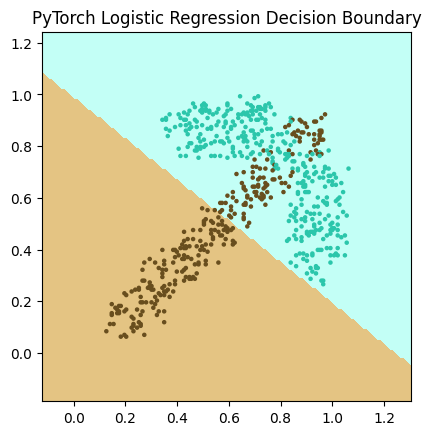

In [10]:
# Initialize parameters
def initialize_parameters(n_features):
    """
    Initialize w, b to torch tensors. w is a (d, 1) column vector,
    b is a scalar, but needs to be registered as a tensor for gradients to track.

    w and b are specified to require grad to ensure their gradient is computed when backward is called

    Inputs:
        n_features: number of features
    Outputs:
        w: Torch Tensor of shape (d, 1) weights
        b: Torch Tensor of shape (1) bias term
    """
    w = torch.zeros((n_features, 1), dtype=torch.float32, requires_grad=True)
    b = torch.zeros(1, dtype=torch.float32, requires_grad=True)
    return w, b

# Sigmoid function
def sigmoid_torch(z):
    """
    Torch has a built in sigmoid function. That's pretty convenient, as it's commonly used in Neural Networks

    Inputs:
        z: torch.tensor of shape (m)
    Outputs:
        activation: torch.tensor of shape (m)
    """
    return torch.sigmoid(z)

# Define cross entropy loss
def loss_torch(p_pred, y):
    """
    Log-loss/Binary Cross Entropy loss function
    """
    loss = -torch.mean(y * torch.log(p_pred) + (1 - y) * torch.log(1 - p_pred), dim=0)
    return loss

# Forward propagation
def forward_torch(w, b, X):
    z = torch.mm(X, w) + b
    A = sigmoid_torch(z)
    return A

# Optimization using PyTorch's automatic gradient calculation
def optimize_pytorch(w, b, X, y, num_iterations, learning_rate, track_gradients=False):
    # Convert inputs to PyTorch tensors
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    for i in range(num_iterations):
        # Forward propagation within a torch gradient tracker
        p_pred = forward_torch(w, b, X)

        # Compute loss
        loss = loss_torch(p_pred, y)

        # Call backward on loss to run the backpropagation step
        loss.backward()

        # Extract gradients
        dw = w.grad
        db = b.grad

        # Update Parameters
        # Note, we are doing manual updates, so we don't want these gradients tracked farther (because we are manually tracking them for demonstration purposes)xw
        with torch.no_grad():
            w -= learning_rate * dw
            b -= learning_rate * db

    # Detach is special to torch. w contains more than just the values in the vector
    # w is also part of a (potentially large) computation graph,
    # detaching variables when you don't need the computation graph anymore saves
    # significant amounts of RAM.
    model_params = {"w": w.detach().numpy(), "b": b.detach().numpy()}

    return model_params, params_list

def predict_torch(w, b, X):
    """
    Prediction method for torch. Run the forward method and turn p_pred into 0 or 1 labels.

    Inputs:
        w: Torch tensor of weights of model
    Outputs:
        predictions: Predicted labels of X, either 0 or 1
    """
    X = torch.tensor(X, dtype=torch.float32)
    p_pred = forward_torch(w, b, X)
    predictions = (p_pred > 0.5).float()
    return predictions

# Example training with PyTorch
n_features = X.shape[1]
w, b = initialize_parameters(n_features)
params_torch, params_list = optimize_pytorch(w, b, X, y, num_iterations=500, learning_rate=0.001, track_gradients=True)

# Predictions and accuracy
predictions_torch = predict_torch(w, b, X)
accuracy_torch = torch.mean((predictions_torch == torch.tensor(y)).float())
print(f"PyTorch model accuracy: {accuracy_torch:.2f}%")

plot_decision_boundary_torch(params_torch["w"], params_torch["b"], X, y)

## Part 3: Build and Train a Simple Perceptron with PyTorch

In this part of the assignment, we will introduce you to torch's neural network module (called `nn`). This time, we use torch to build a simple perceptron (i.e., a neural network with no hidden layers) with a sigmoid activation function, so that this neural network encodes logistic regression. Once again, this code should function more or less as our implementation of logistic regression in torch, and as your implementation of logistic regression from scratch.

You should use the following functions provided by `nn`.
`nn.Linear`, which creates a linear layer (the most common type of layer in neural networks).
`nn.Sigmoid`, which creates a sigmoid activation function.

You should create these in `__init__`, and use them for the forward pass of the model.

You can find the torch documentation [here](https://pytorch.org/docs/stable/index.html).

In [11]:
import torch.nn as nn

class SingleLayerPerceptron(nn.Module):
    """
    A simple single neuron (perceptron) torch model.
    """
    def __init__(self, input_dim, output_dim):
        """
        Inputs:
            input_dim: number of input features d
            output_dim: number of output features (1, in this case)
        """
        super(SingleLayerPerceptron, self).__init__()
        # define linear layer
        self.linear = nn.Linear(input_dim, output_dim)
        self.sigmoid = nn.Sigmoid()

    def forward(self, X):
        """
        The forward method (i.e., go from inputs (X) to outputs)
        """
        # apply linear transformation and sigmoid activation
        out = self.linear(X)
        return self.sigmoid(out)

But wait... there's a forward method for our model, don't we have to write the backward pass as well? No! Since `SingleLayerPerceptron` inherits from `nn.Module`, it is provided with a `backward` method already that automatically computes the gradients of the model's parameters! That's the beauty of working with PyTorch!

There's one other important note about `nn.Module`: `nn.Module` overloads the parentheses operator (`__call__`) to run the forward method. To run the forward pass on a model, you can either call `model.forward(X)` or `model(X)`, they are equivalent.

In [12]:
# Compute loss
def loss_mlp(p_pred, y):
    """
    Compute Log Loss (BCE)
    """
    m = y.shape[0]
    loss = -(1 / m) * torch.sum(y * torch.log(p_pred) + (1 - y) * torch.log(1 - p_pred))
    return loss

# Train the MLP
def train_mlp(model, X, y, num_iterations, learning_rate):
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    for i in range(num_iterations):
        # Forward propagation
        p_pred = model.forward(X)

        # Compute loss
        loss = loss_mlp(p_pred, y)

        # Backward propagation
        loss.backward()

        # Update parameters manually
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad

        # Zero the gradients
        # (if you don't clear the gradients, the parameters will continue to accumulate information)
        model.zero_grad()

    return model

# Predict function for MLP
def predict_mlp(model, X):
    X = torch.tensor(X, dtype=torch.float32)
    with torch.no_grad():
        output = model.forward(X)
        predictions = (output > 0.5).float()
    return predictions

def accuracy_torch(model, X, y):
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y)
    with torch.no_grad():
        p_pred = model.forward(X)
        predictions = (p_pred > 0.5).float()
        return torch.mean((predictions == y).float())

# Visualize decision boundary for MLP
def plot_decision_boundary_mlp(model, X, y):
    X = X.numpy()
    y = y.numpy()
    x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + 0.25
    y_min, y_max = X[:, 1].min() - 0.25, X[:, 1].max() + 0.25
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    X_new = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = model(X_new)
    Z = (Z > 0.5).float().detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=1, levels=[-1, 0, 1], colors=["#E4C483", "#C3FFF6"])
    color_dict = {0 : BLUE_PIXEL / 256, 1 : BROWN_PIXEL / 256}
    colors = [color_dict[label] for label in y[:, 0]]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=5)
    plt.title("Decision Boundary")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [13]:
def train_mlp(model, X, y, num_iterations, learning_rate):
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    for i in range(num_iterations+1):
        # Forward propagation
        p_pred = model.forward(X)

        # Compute loss
        loss = loss_mlp(p_pred, y)
        # Backward propagation
        loss.backward()

        # Update parameters manually
        with torch.no_grad():
            # Loop over every parameter, update that parameter
            for param in model.parameters():
                param -= learning_rate * param.grad

        # Zero the gradients
        # (if you don't clear the gradients, the parameters will continue to accumulate information)
        model.zero_grad()

        # Record the loss
    return model

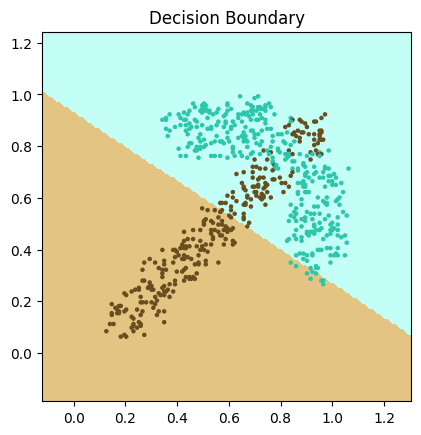

Final Model Accuracy:  tensor(0.8096)


In [14]:
n_features = X.shape[1]
model = SingleLayerPerceptron(input_dim=n_features, output_dim=1)
model = train_mlp(model, X, y, 1000, 0.1)

plot_decision_boundary_mlp(model, torch.tensor(X), torch.tensor(y))
model_accuracy = predict_mlp(model, X)
print("Final Model Accuracy: ", accuracy_torch(model, X, y))

## Part 4: Build and Train a Multilayer Perceptron with PyTorch

Now it's your turn to come up with your own Neural Network! Add Torch operations to MyMLP below. Here are some of the parameters you might want to play around with:

Number and size of layers in your Neural Network:

For now, you should use `nn.Linear`, which is the standard (feed-foward) layer for neural networks.
`nn.Linear` takes two parameters, the input dimension and the output dimension for the layer. They key thing to know when constructing your network, is that the size of the output of a linear layer must match the input size of the following layer. If they do not match, you'll get a shape error.

After every linear layer, you should add an activation function.

**Conceptual checkpoint:** Why is it important to add a non-linear activation function to each layer?

Activation Functions:
1. `nn.ReLU`: Rectified Linear Unit. ReLU(x) = x, if $x\geq 0$, else ReLU(x)$ = 0$.
1. `nn.Tanh`: Hyperbolic Tan Function.
1. `nn.Sigmoid`: Can be used as an activation function in hidden layers, as well as for the output neuron.

Hint: In our experience, Tanh and Sigmoids work best for this classification problem.

You may also want to experiment with the number of iterations gradient descent is run for and the learning rate of your model as well.

### Task: MyMLP
Find a set of parameters for you `MyMLP` that separates the data much better than your logistic regressions. For full credit, you should achieve greater than 90% accuracy with your model. We have provided a working (but perhaps overly complicated) model for you below this section called `StaffMLP`. This may help you to see a working Torch Neural Network class. Obviously, your model should be different from `StaffMLP`.

It should satisfy the following requirements:
1. Consist of multiple hidden layers (layers that are not the input or output of the network)
1. These hidden layers should not all be the same size, their input and output dimensions should differ in some way.

After you complete this task, you should answer the following questions in your README:
1. What hyper-parameters did you experiment with (i.e., number and size of layers, activation functions, learning rates, etc.)
1. What effect on performance did these hyper-parameters have? How did you happen to your final setting, was it random search or did you use some other reasoning?
1. What effect would you expect doubling the size of each layer to have (other than the input and output layers)? Try your model with more parameters, does it perform better/worse/the same?

<ipython-input-12-38bb8008cfb2>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


Final MLP model accuracy: 0.98%


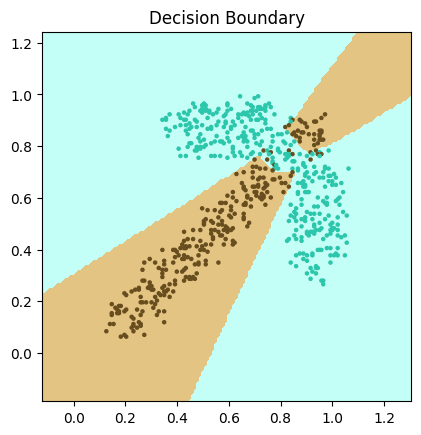

In [15]:
class MyMLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim1, hidden_dim2, hidden_dim3):
        """
        Inputs:
            input_dim: Number of features. Must match input dimension of first linear layer
            output_dim: Number of outputs (1 in this case). Must match the output dimension of your final linear layer
        """
        super(MyMLP, self).__init__()
        # TODO: Add model layers and activation functions
        self.fc1 = nn.Linear(input_dim, hidden_dim1) # first hidden
        self.fc2 = nn.Linear(hidden_dim1, hidden_dim1)
        self.fc3 = nn.Linear(hidden_dim1, hidden_dim2)
        self.fc4 = nn.Linear(hidden_dim2, hidden_dim2)
        self.fc5 = nn.Linear(hidden_dim2, hidden_dim3)
        self.fc6 = nn.Linear(hidden_dim3, hidden_dim3)
        self.fc7 = nn.Linear(hidden_dim3, output_dim)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()


    def forward(self, X):
        """
        The forward pass of your neural network.
        Take in input X and run each layer of the network.
        Your forward pass should use each of the layers in your network
        """
        # Add forward pass
        z1 = self.fc1(X)
        a1 = torch.tanh(z1)
        z2 = self.fc2(a1)
        a2 = torch.relu(z2)
        z3 = self.fc3(a2)
        a3 = torch.sigmoid(z3)
        z4 = self.fc4(a3)
        a4 = torch.tanh(z4)
        z5 = self.fc5(a4)
        a5 = torch.relu(z5)
        z6 = self.fc6(a5)
        a6 = torch.tanh(z6)
        z7 = self.fc7(a6)
        output = self.sigmoid(z7)
        return output

input_dim = X.shape[1]
output_dim = 1 # The output dimension should be 1
# add hidden dims
hidden_dim1 = 60
hidden_dim2 = 70
hidden_dim3 = 50
model = MyMLP(input_dim, output_dim, hidden_dim1, hidden_dim2, hidden_dim3)
model = train_mlp(model, X, y, 50000, learning_rate=.05)

# Final predictions and accuracy
X_tensor = torch.tensor(X, dtype=torch.float32)
predictions_mlp = predict_mlp(model, X_tensor)
accuracy_mlp = torch.mean((predictions_mlp == torch.tensor(y)).float())
print(f"Final MLP model accuracy: {accuracy_mlp:.2f}%")
plot_decision_boundary_mlp(model, torch.tensor(X), torch.tensor(y))

## Part 5: Our model parameters

<ipython-input-12-38bb8008cfb2>:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


Final MLP model accuracy: 0.91%


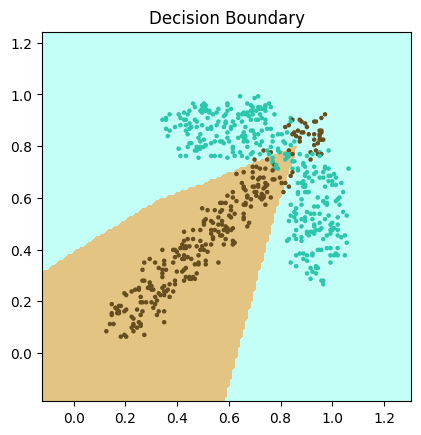

In [16]:
# Define the MLP class
class StaffMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(StaffMLP, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_dim, hidden_dim)  # First hidden layer
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim) # Output layer
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, X):
        # Forward pass
        z1 = self.fc1(X)
        a1 = torch.relu(z1)  # Activation function for hidden layer
        z2 = self.fc2(a1)
        a2 = self.tanh(z2)
        z3 = self.fc3(a2)
        a3 = torch.relu(z3)
        z4 = self.fc4(a3)
        a4 = self.tanh(z4)
        z5 = self.fc5(a4)
        output = self.sigmoid(z5)  # Sigmoid activation for output
        return output

# Example training with the MLP
input_dim = X.shape[1]
hidden_dim = 32  # You can change the number of hidden units
output_dim = 1 # The output dimension should be 1
model = StaffMLP(input_dim, hidden_dim, output_dim)
model = train_mlp(model, X, y, 50000, learning_rate=0.001)

# Final predictions and accuracy
X_tensor = torch.tensor(X, dtype=torch.float32)
predictions_mlp = predict_mlp(model, X_tensor)
accuracy_mlp = torch.mean((predictions_mlp == torch.tensor(y)).float())
print(f"Final MLP model accuracy: {accuracy_mlp:.2f}%")
plot_decision_boundary_mlp(model, torch.tensor(X), torch.tensor(y))